In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../Fantasy-Premier-League/data/2022-23/cleaned_players.csv", index_col=None)
data.head(2)

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type
0,Granit,Xhaka,7,8,153,2992,35,673.3,647.0,498.0,15,634,182.0,13,0,4,2.7,48,MID
1,Mohamed,Elneny,0,0,6,111,2,5.4,4.6,0.0,0,27,1.1,0,0,0,0.6,41,MID


In [3]:
data.shape

(778, 19)

In [4]:
data.columns.values

array(['first_name', 'second_name', 'goals_scored', 'assists',
       'total_points', 'minutes', 'goals_conceded', 'creativity',
       'influence', 'threat', 'bonus', 'bps', 'ict_index', 'clean_sheets',
       'red_cards', 'yellow_cards', 'selected_by_percent', 'now_cost',
       'element_type'], dtype=object)

In [5]:
X = data[["creativity", "influence", "threat", 'ict_index', 'clean_sheets', 'selected_by_percent', 'now_cost', 'element_type']]
Y = data[["goals_scored", "assists", "total_points", 'minutes', 'goals_conceded', 'bonus', 'clean_sheets', 'red_cards', 'yellow_cards', 'selected_by_percent', 'now_cost']]

In [6]:
X.head()

,creativity,influence,threat,ict_index,clean_sheets,selected_by_percent,now_cost,element_type
0,673.3,647.0,498.0,182.0,13,2.7,48,MID
1,5.4,4.6,0.0,1.1,0,0.6,41,MID
2,10.3,152.0,54.0,21.6,0,0.2,42,DEF
3,439.6,513.2,240.0,119.5,11,0.4,47,MID
4,1100.4,960.0,920.0,298.3,13,33.3,69,MID


In [7]:
Y.head()

,goals_scored,assists,total_points,minutes,goals_conceded,bonus,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost
0,7,8,153,2992,35,15,13,0,4,2.7,48
1,0,0,6,111,2,0,0,0,0,0.6,41
2,1,0,21,562,13,0,0,0,0,0.2,42
3,3,0,86,2480,28,6,11,0,5,0.4,47
4,15,8,212,3132,38,30,13,0,4,33.3,69


In [8]:
X[['element_type']].value_counts()

element_type
MID             338
DEF             262
FWD              93
GK               85
Name: count, dtype: int64

In [10]:
# todo: refactor, categorical to numerical
X.loc[X['element_type'] == 'DEF', 'element_type'] = 2
X.loc[X['element_type'] == 'GK', 'element_type'] = 1
X.loc[X['element_type'] == 'MID', 'element_type'] = 3
X.loc[X['element_type'] == 'FWD', 'element_type'] = 4

In [11]:
X.head()

,creativity,influence,threat,ict_index,clean_sheets,selected_by_percent,now_cost,element_type
0,673.3,647.0,498.0,182.0,13,2.7,48,3
1,5.4,4.6,0.0,1.1,0,0.6,41,3
2,10.3,152.0,54.0,21.6,0,0.2,42,2
3,439.6,513.2,240.0,119.5,11,0.4,47,3
4,1100.4,960.0,920.0,298.3,13,33.3,69,3


In [12]:
Y.columns

Index(['goals_scored', 'assists', 'total_points', 'minutes', 'goals_conceded',
       'bonus', 'clean_sheets', 'red_cards', 'yellow_cards',
       'selected_by_percent', 'now_cost'],
      dtype='object')

In [13]:
# fit a model to predict points
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X.values,
    Y['total_points'].values,
    test_size=.33,
    shuffle=True,
    random_state=42
)

In [15]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_estimators=100, verbose=0, criterion='squared_error')
reg.fit(X_train, y_train)

RandomForestRegressor()

In [16]:
reg.score(X_test, y_test)

0.9678589760089412

In [17]:
pred = reg.predict(X_test)

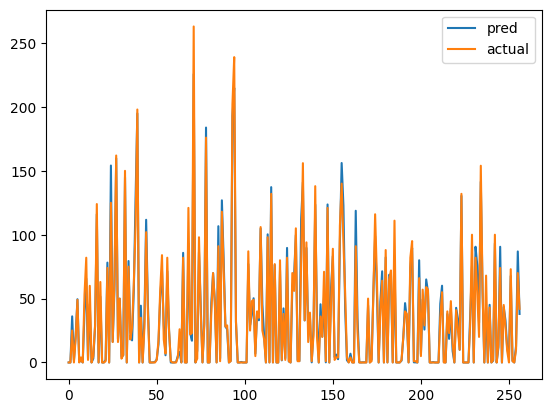

In [18]:
plt.plot(pred, label='pred')
plt.plot(y_test, label='actual')
plt.legend()
plt.show()

In [19]:
elements = ["creativity", "influence", "threat", 'ict_index', 'clean_sheets', 'selected_by_percent', 'now_cost', 'element_type']

In [23]:
def make_player_pred(fst_nm, lst_nm):
    player = data[
        (data['first_name'] == fst_nm) & (data['second_name'] == lst_nm)
    ][["creativity", "influence", "threat", 'ict_index', 'clean_sheets', 'selected_by_percent', 'now_cost', 'element_type']]

    player.loc[player['element_type'] == 'DEF', 'element_type'] = 2
    player.loc[player['element_type'] == 'GK', 'element_type'] = 1
    player.loc[player['element_type'] == 'MID', 'element_type'] = 3
    player.loc[player['element_type'] == 'FWD', 'element_type'] = 4

    print(f"{fst_nm} {lst_nm}:")
    print(player.values)
    return reg.predict(player.values)

In [24]:
print(make_player_pred('Gabriel', 'Fernando de Jesus'))
print(make_player_pred('Kevin', 'De Bruyne'))
print(make_player_pred('Harry', 'Kane'))
print(make_player_pred('Raheem', 'Sterling'))
print(make_player_pred('Pascal', 'Groß'))
print(make_player_pred('Luis', 'Díaz'))

Gabriel Fernando de Jesus:
[[407.3 594.2 1282.0 228.3 9 28.3 81 4]]
[154.16]
Kevin De Bruyne:
[[1476.7 897.8 598.0 297.6 10 25.5 121 3]]
[184.38]
Harry Kane:
[[744.8 1256.6 1707.0 371.0 11 32.7 115 4]]
[225.66]
Raheem Sterling:
[[479.8 388.2 603.0 146.8 5 3.4 97 3]]
[98.89]
Pascal Groß:
[[1215.4 888.4 578.0 268.6 11 11.0 54 3]]
[158.26]
Luis Díaz:
[[176.7 236.2 388.0 80.1 4 6.6 78 3]]
[61.7]


In [25]:
print(make_player_pred('Marc', 'Cucurella Saseta'))
print(make_player_pred('William', 'Saliba'))
print(make_player_pred('Trent', 'Alexander-Arnold'))

Marc Cucurella Saseta:
[[232.5 354.4 72.0 65.9 6 5.0 49 2]]
[68.29]
William Saliba:
[[100.8 529.0 114.0 74.5 12 15.6 49 2]]
[111.94]
Trent Alexander-Arnold:
[[1168.2 779.0 241.0 219.0 10 30.7 78 2]]
[162.35]
